In [1]:
!pip install xarray
!pip install pandas
!pip install seaborn
!pip install xarray





In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

In [52]:
df = pd.read_csv('thailand.csv')

In [53]:
df.loc[:,'BurntArea'].mean()

454.9875913380282

In [54]:
df=df.drop(['FCD_emissions', 'FRP_emissions','time'], axis=1)

,latitude,longitude,BurntArea,BAs_GWIS,FCCI_BA,ws10,Lai,swvl1,mslp,rH_cf,ssr,NDVI
latitude,1.000000,-0.052638,0.263642,0.188469,0.300608,-0.287879,0.000791,0.058135,0.053796,-0.122096,-0.169095,0.066703
longitude,-0.052638,1.000000,0.103124,0.059241,0.222572,-0.012783,0.019231,-0.101552,-0.152432,-0.223802,0.363337,-0.010949
BurntArea,0.263642,0.103124,1.000000,0.170032,0.710013,0.114951,-0.106150,-0.273136,0.310302,-0.339546,-0.111516,0.029605
BAs_GWIS,0.188469,0.059241,0.170032,1.000000,0.364906,0.094883,0.017810,-0.170770,0.314630,-0.284917,-0.163243,0.088432
FCCI_BA,0.300608,0.222572,0.710013,0.364906,1.000000,0.149118,-0.032369,-0.331062,0.414946,-0.493848,-0.199181,0.115022
ws10,-0.287879,-0.012783,0.114951,0.094883,0.149118,1.000000,-0.194559,-0.598072,0.389762,-0.475183,0.213760,-0.356402
Lai,0.000791,0.019231,-0.106150,0.017810,-0.032369,-0.194559,1.000000,-0.016801,0.246078,-0.088440,0.049400,0.747020
swvl1,0.058135,-0.101552,-0.273136,-0.170770,-0.331062,-0.598072,-0.016801,1.000000,-0.801580,0.871748,-0.158951,-0.084396
mslp,0.053796,-0.152432,0.310302,0.314630,0.414946,0.389762,0.246078,-0.801580,1.000000,-0.835069,-0.179036,0.406039
rH_cf,-0.122096,-0.223802,-0.339546,-0.284917,-0.493848,-0.475183,-0.088440,0.871748,-0.835069,1.000000,0.039804,-0.202162


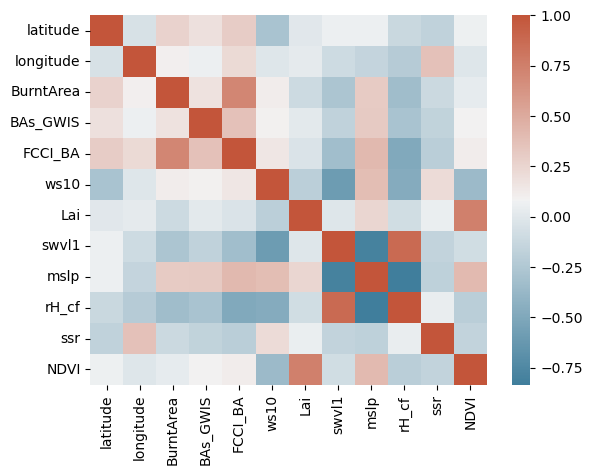

In [55]:
corr2=df.corr()
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr2,cmap=cmap)
corr2

In [56]:
from scipy.stats import zscore
df.dtypes
#df=df.apply(zscore)

latitude     float64
longitude    float64
BurntArea    float64
BAs_GWIS     float64
FCCI_BA      float64
ws10         float64
Lai          float64
swvl1        float64
mslp         float64
rH_cf        float64
ssr          float64
NDVI         float64
dtype: object

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import HistGradientBoostingRegressor


In [58]:
X = df.drop(["BurntArea"], axis=1)
y = df["BurntArea"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [60]:
#reg = LogisticRegression()
#reg= LinearRegression()
reg = MLPRegressor(hidden_layer_sizes=(25,6), activation='relu', solver='adam', alpha=0.0005, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=2000, shuffle=True, random_state=None, tol=0.0001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
reg.fit(X_train, y_train)
#est = HistGradientBoostingRegressor().fit(X_train, y_train)

ValueError: Input X contains NaN.
MLPRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [61]:
reg.score(X_test, y_test)

ValueError: Input X contains NaN.
MLPRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [3]:
df2=pd.read_csv('BAOverZero.csv')
df2=df2.loc[(df2['latitude']>40)&(df2['latitude']<60)&(df2['longitude']>90)&(df2['longitude']<100)&(df2['BurntArea']>3000)]

NameError: name 'pd' is not defined

In [11]:
df2=df2.drop(['time','Unnamed: 0'],axis=1)

In [12]:
df2

,latitude,longitude,BurntArea,NDVI,DCM,LST,WIND,PRECIP,SSR
29945,51.375,95.125,3322.5796,0.268800,558.00620,15318.200,2.215469,11.277489,19.876766
29946,51.375,95.375,4565.8700,0.295595,520.34375,15131.000,2.018625,11.773139,19.965565
35437,50.375,95.875,4480.1200,0.545522,588.09580,14955.400,1.808526,7.925791,21.288635
35500,50.125,95.875,4865.9697,0.432292,940.62290,15062.750,2.158853,4.432695,21.273724
35501,50.125,96.125,22657.8600,0.435663,881.70210,15127.167,2.117199,4.693778,21.392365
35502,50.125,96.375,5466.1900,0.617054,801.66250,14750.667,2.178970,4.417304,21.459597
35679,49.625,95.375,3043.9100,0.313855,534.44580,15682.200,2.113701,1.746840,19.719540
36061,48.375,98.125,3365.4600,0.506835,573.62110,15246.833,2.039842,5.386037,19.912584
59326,51.625,95.125,4415.8203,0.342132,754.88750,15693.167,1.557124,7.916203,21.072530
59394,51.125,97.375,5294.6900,0.659097,283.38333,14928.667,1.390593,4.265609,22.546759


In [2]:
corr2=df2.corr()
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr2,cmap=cmap)
corr2

NameError: name 'df2' is not defined

In [193]:
X = df.drop(["BurntArea"], axis=1)
y = df["BurntArea"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [195]:
est2 = HistGradientBoostingRegressor().fit(X_train, y_train)

In [196]:
est2.score(X_test,y_test)

0.25412213940603934

In [3]:
df3=pd.read_csv('oneLocationAllFeatures.csv')

In [4]:
df3=df3.drop(['latitude'], axis=1)
df3=df3.drop(['longitude'], axis=1)
df3=df3.drop(['fcd_emissions'], axis=1)
df3=df3.drop(['FRP_emissions'], axis=1)
df3=df3.drop(['fwi'], axis=1)
df3=df3.drop(['mean_fwi'], axis=1)
df3=df3.drop(['Unnamed: 0'], axis=1)
df3=df3.drop(['population_density'], axis=1)

In [5]:
df3.shape

(29508, 28)

In [14]:
df3.dropna()
df3=df3.loc[df3['BurntArea']>3000]

In [15]:
corr2=df3.corr()
corr2

,BurntArea,DCM,LST,WIND,PRECIP,SSR,LST_Day_CMG,Lai,censo,ea,...,skt,soi,ssrd,sst,swvl1,t2m,t2mmax,t2mmin,vpd_cf,wp
BurntArea,1.000000,-0.035942,0.066261,0.249624,-0.086986,-0.088161,0.066261,-0.204001,-0.001009,0.002064,...,-0.004539,-0.011500,-0.030299,0.003461,-0.215035,-0.058501,-0.016669,-0.098679,0.045266,-0.012034
DCM,-0.035942,1.000000,0.452320,0.151596,-0.048851,0.178561,0.452320,-0.399712,-0.323634,-0.245521,...,0.304290,0.307757,0.356805,0.083761,-0.207681,0.258733,0.298712,0.156958,0.605291,0.103073
LST,0.066261,0.452320,1.000000,0.013338,-0.086694,0.383644,1.000000,-0.226095,-0.298652,-0.249464,...,0.757471,0.240991,0.499942,0.000807,-0.265596,0.711909,0.750075,0.599729,0.692197,0.117166
WIND,0.249624,0.151596,0.013338,1.000000,-0.220386,-0.131937,0.013338,-0.563982,-0.273410,-0.267288,...,-0.043154,0.202553,0.053948,0.073239,-0.516563,-0.216019,-0.173167,-0.290395,0.237344,0.174041
PRECIP,-0.086986,-0.048851,-0.086694,-0.220386,1.000000,-0.098688,-0.086694,0.136943,-0.182339,-0.158314,...,-0.125108,0.127230,-0.117691,-0.016128,0.454882,-0.091471,-0.169800,0.003930,-0.305692,0.072436
SSR,-0.088161,0.178561,0.383644,-0.131937,-0.098688,1.000000,0.383644,0.138782,-0.282523,-0.266346,...,0.304881,0.157751,0.938908,0.008458,0.192287,0.345458,0.370841,0.265701,0.428078,0.132382
LST_Day_CMG,0.066261,0.452320,1.000000,0.013338,-0.086694,0.383644,1.000000,-0.226095,-0.298652,-0.249464,...,0.757471,0.240991,0.499942,0.000807,-0.265596,0.711909,0.750075,0.599729,0.692197,0.117166
Lai,-0.204001,-0.399712,-0.226095,-0.563982,0.136943,0.138782,-0.226095,1.000000,0.278000,0.269351,...,0.074635,-0.275180,-0.054990,-0.036769,0.526851,0.227440,0.136417,0.364047,-0.328936,-0.209795
censo,-0.001009,-0.323634,-0.298652,-0.273410,-0.182339,-0.282523,-0.298652,0.278000,1.000000,0.925510,...,-0.196958,-0.932023,-0.376868,-0.028276,0.023484,-0.147298,-0.125729,-0.106523,-0.289731,-0.637605
ea,0.002064,-0.245521,-0.249464,-0.267288,-0.158314,-0.266346,-0.249464,0.269351,0.925510,1.000000,...,-0.176683,-0.860645,-0.351726,-0.043488,0.011794,-0.122782,-0.098719,-0.082952,-0.256023,-0.872172


<Axes: xlabel='BurntArea'>

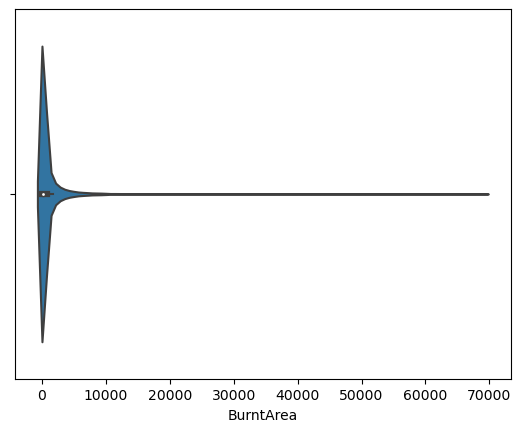

In [9]:
sns.violinplot(data=df3, x="BurntArea")

<Axes: >

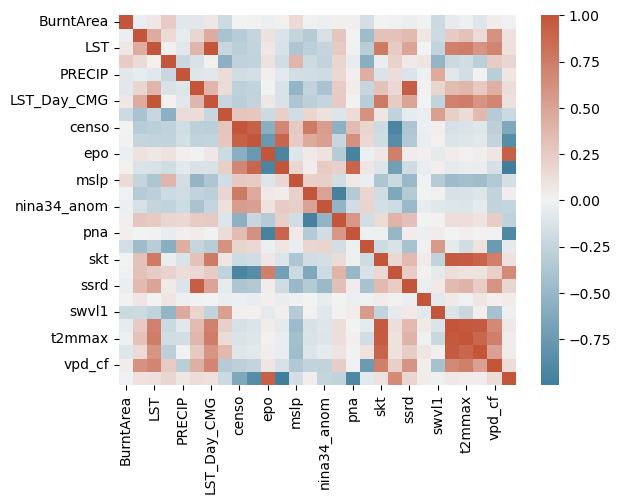

In [16]:
corr2=df3.corr()
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr2,cmap=cmap)

<Axes: xlabel='WIND', ylabel='BurntArea'>

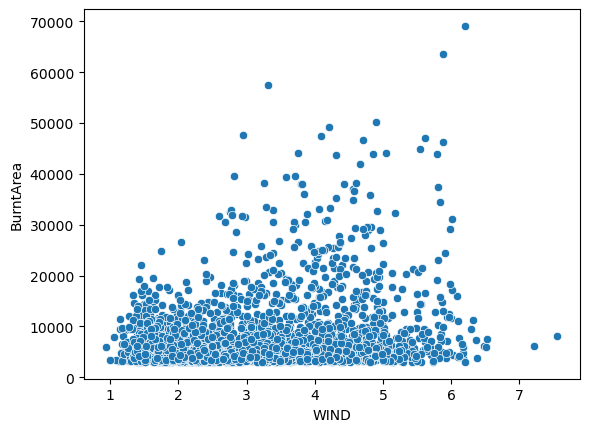

In [18]:
sns.scatterplot(data=df3, x="WIND", y="BurntArea")

<Axes: xlabel='BurntArea', ylabel='Lai'>

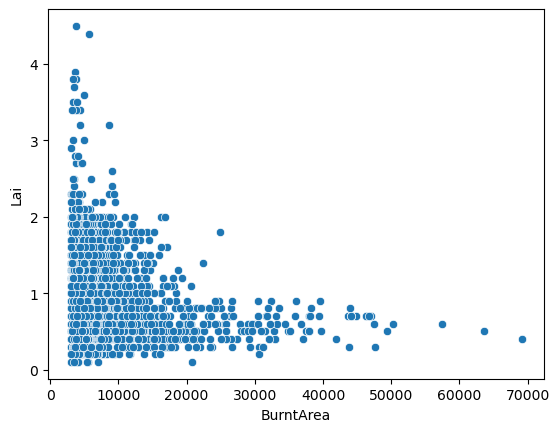

In [19]:
sns.scatterplot(data=df3, x="BurntArea", y="Lai")